<a href="https://colab.research.google.com/github/csmotherman/CSC302-Midterm/blob/main/CSC202_Group_2_Midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Temporary text box*



**Questions we can consider as a group (list any more that you can think of)**


*   What sleep disorder is the most popular amonng the group?
*   What is the leading cause of Sleep Apnea and Insomnia? (Should be our conclusion or main question)
*   Which sex is more likely to have a sleep disorder?
*   What is the likeliness of a sleep disorder based on age?
*   Does length and quality of sleep affect whether you have a disorder?



**Importing Packages**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Loading in dataset**

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Sleep_health_and_lifestyle_dataset.csv')
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [6]:
print('Number of Males: ' ,len(df[df['Gender'] == 'Male']))
print('Number of Females: ' ,len(df[df['Gender'] == 'Female']))

Number of Males:  189
Number of Females:  185


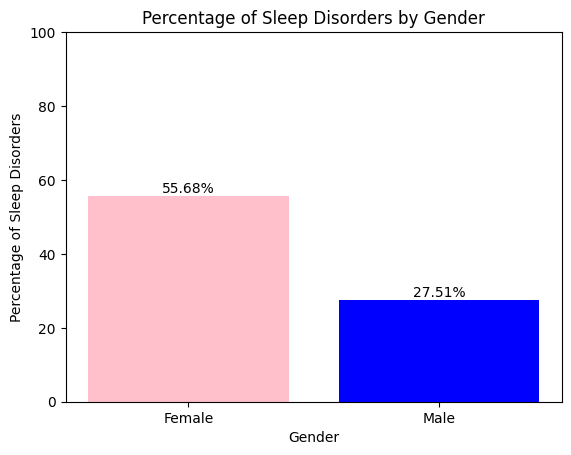

In [7]:
# Create a copy so that we do not change any values in the main data frame
temp_df = df.copy()

# Calculating whether they have a sleep disorder or not, so convert to binary values
temp_df['Sleep Disorder'].replace({'None': 0, 'Sleep Apnea': 1, 'Insomnia': 1}, inplace=True)


# Calculate the percentage of individuals with sleep disorders for each gender
groups = temp_df.groupby('Gender')['Sleep Disorder']
gender_sleep_disorder_percentage = 100*groups.sum()/groups.count()

# Plot a bar graph based on the percentage of each genders that have a disorder
bars = plt.bar(gender_sleep_disorder_percentage.index, gender_sleep_disorder_percentage, color=['pink', 'blue'])
male_pct_str = str(round(gender_sleep_disorder_percentage['Male'],2)) + '%'
female_pct_str = str(round(gender_sleep_disorder_percentage['Female'],2)) + '%'
plt.bar_label(bars, labels=[female_pct_str,male_pct_str], color='black')
plt.title('Percentage of Sleep Disorders by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage of Sleep Disorders')
plt.ylim(0, 100)
plt.show()


In [8]:
#See if there are any occupation that don't have a valid amount of data
print(df['Occupation'].value_counts())

#Take out any data that has less than 10 rows of data
clean_df = df[df['Occupation'] != 'Manager']
clean_df = clean_df[clean_df['Occupation'] != 'Scientist']
clean_df = clean_df[clean_df['Occupation'] != 'Sales Representative']
clean_df = clean_df[clean_df['Occupation'] != 'Software Engineer']
clean_df = clean_df[clean_df['Occupation'] != 'Salesperson']
print(clean_df['Occupation'].value_counts())
clean_df



Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: Occupation, dtype: int64
Nurse         73
Doctor        71
Engineer      63
Lawyer        47
Teacher       40
Accountant    37
Name: Occupation, dtype: int64


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


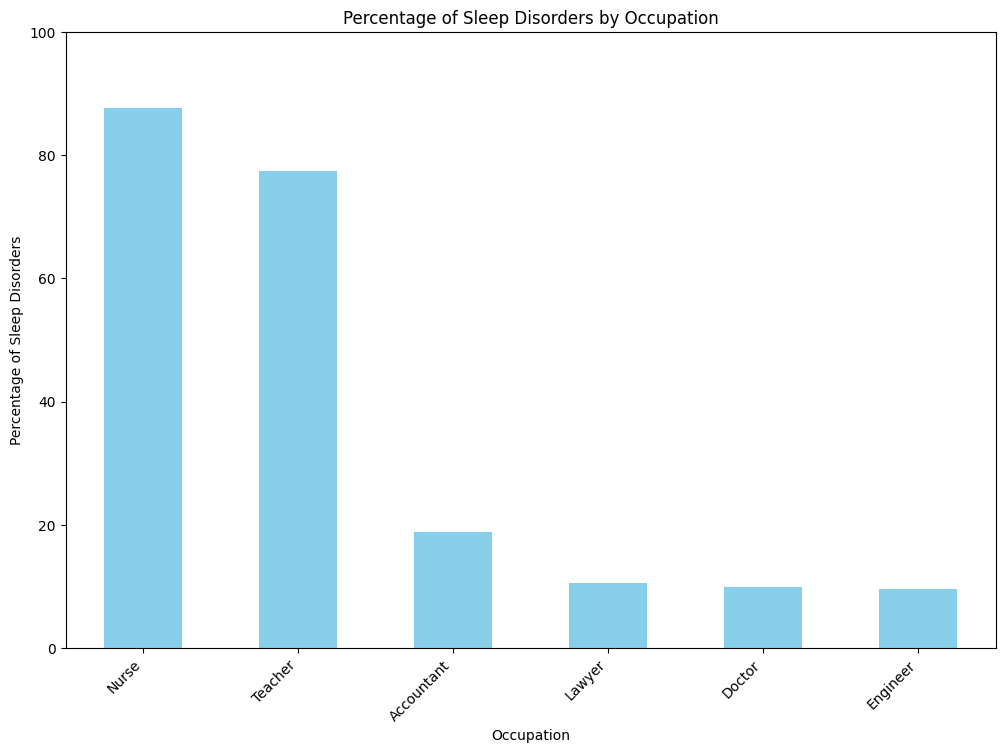

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

occupation_df = clean_df.copy()
occupation_df['Sleep Disorder'].replace({'None': 0, 'Sleep Apnea': 1, 'Insomnia': 1}, inplace=True)

occupation_sleep_percentage = occupation_df.groupby('Occupation')['Sleep Disorder'].mean() * 100

# Create a bar chart
plt.figure(figsize=(12, 8))
occupation_sleep_percentage.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Percentage of Sleep Disorders by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Percentage of Sleep Disorders')
plt.ylim(0,100)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.show()

Text(0.5, 1.05, 'Distribution of Age by Sleep Disorder and Gender')

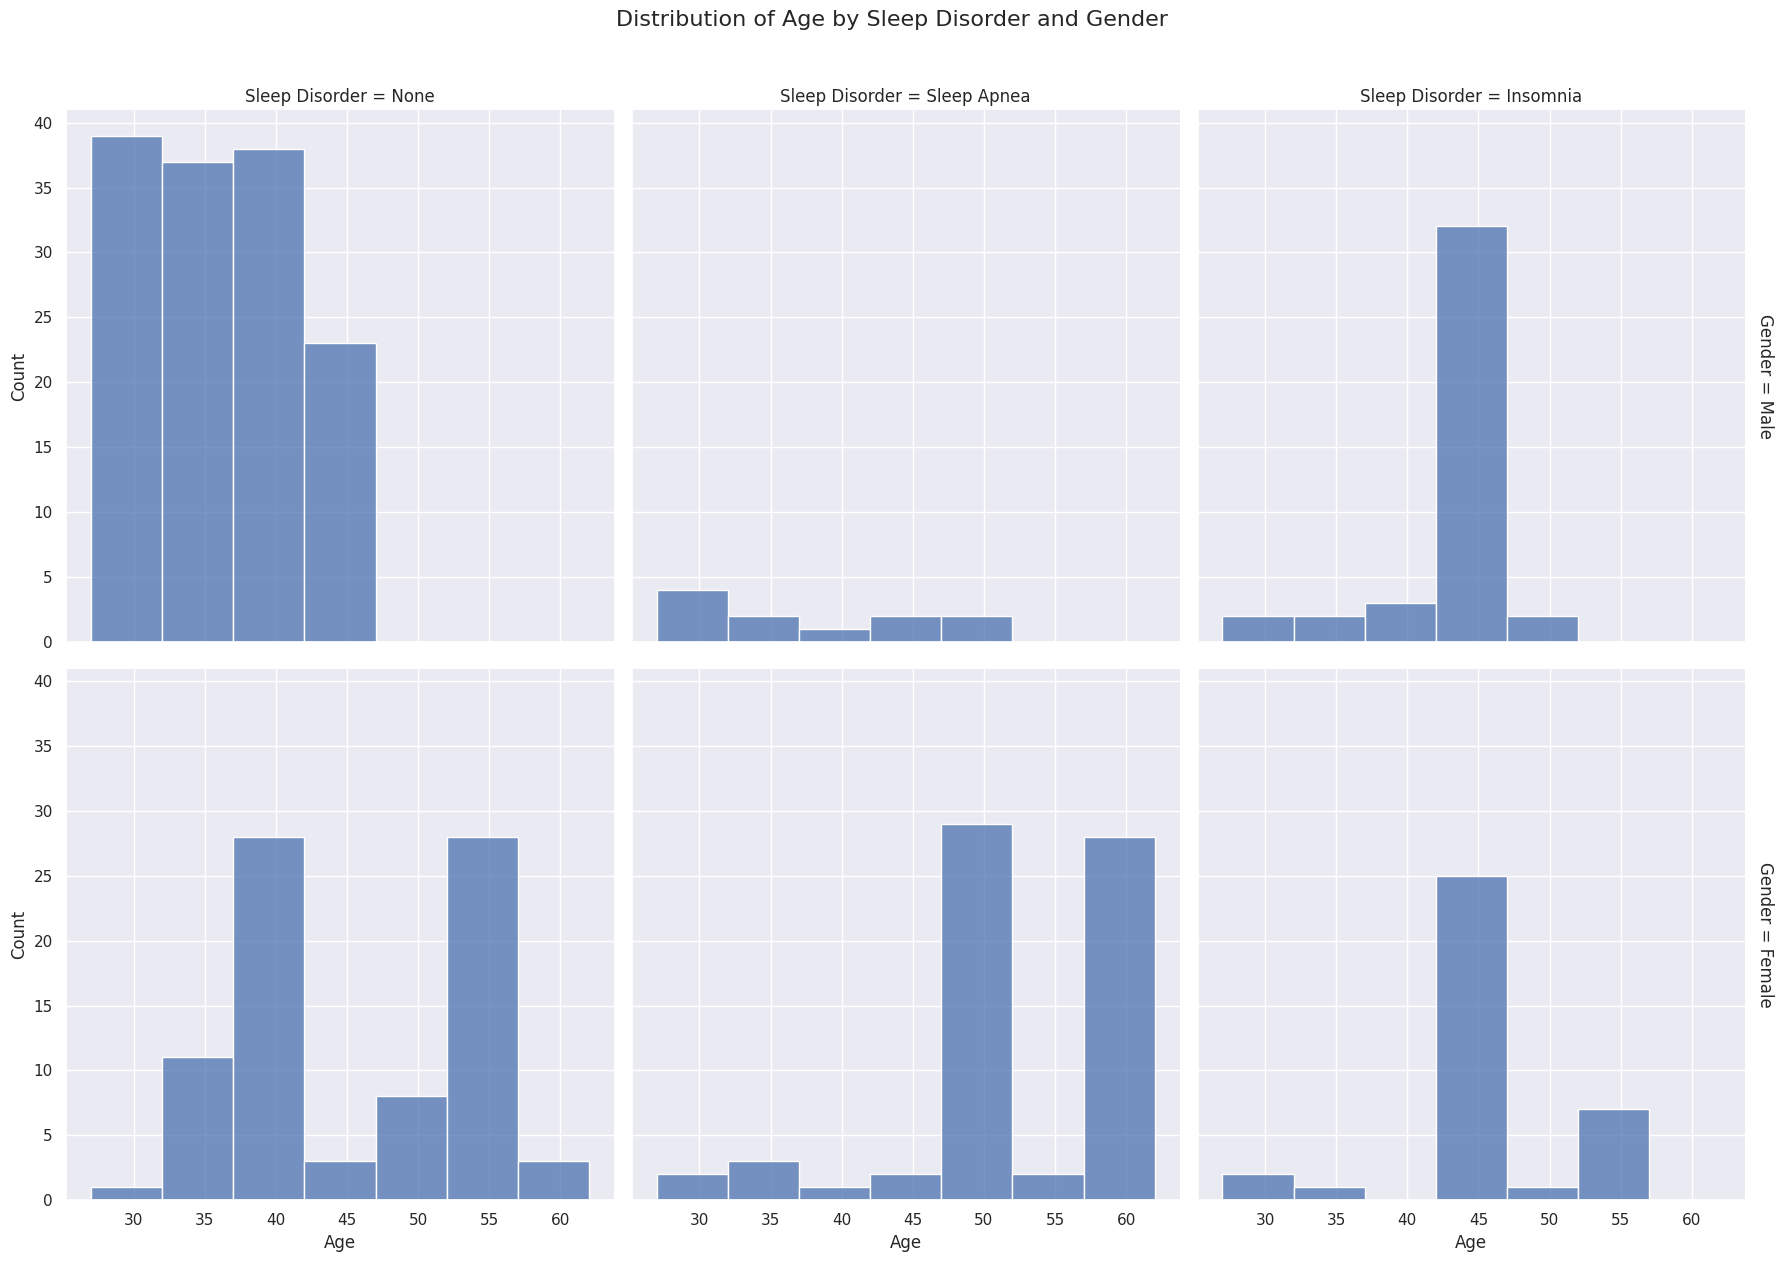

In [10]:
sns.set_theme(style="darkgrid")
plot = sns.displot(
    df, x="Age", col="Sleep Disorder", row="Gender",
    binwidth=5, height=6, facet_kws=dict(margin_titles=True),
)
plot.set_xlabels(label="Age", fontsize=12)
plot.set_ylabels(label="Count", fontsize=12)
plot.fig.suptitle("Distribution of Age by Sleep Disorder and Gender", y=1.05, fontsize=16)

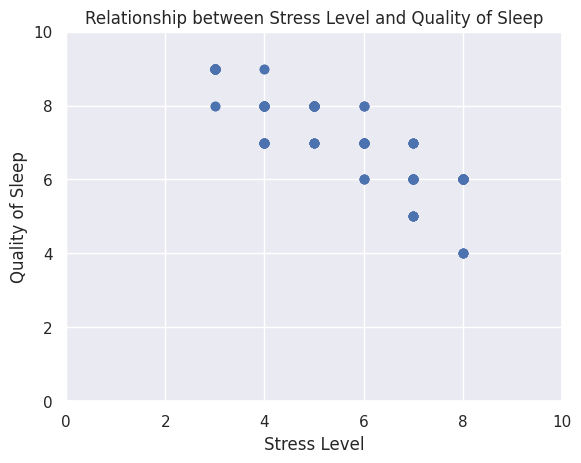

In [11]:
plt.scatter(data=df, x='Stress Level', y='Quality of Sleep')
plt.title('Relationship between Stress Level and Quality of Sleep')
plt.xlabel('Stress Level')
plt.ylabel('Quality of Sleep')
plt.xlim(0,10)
plt.ylim(0,10)
plt.show()


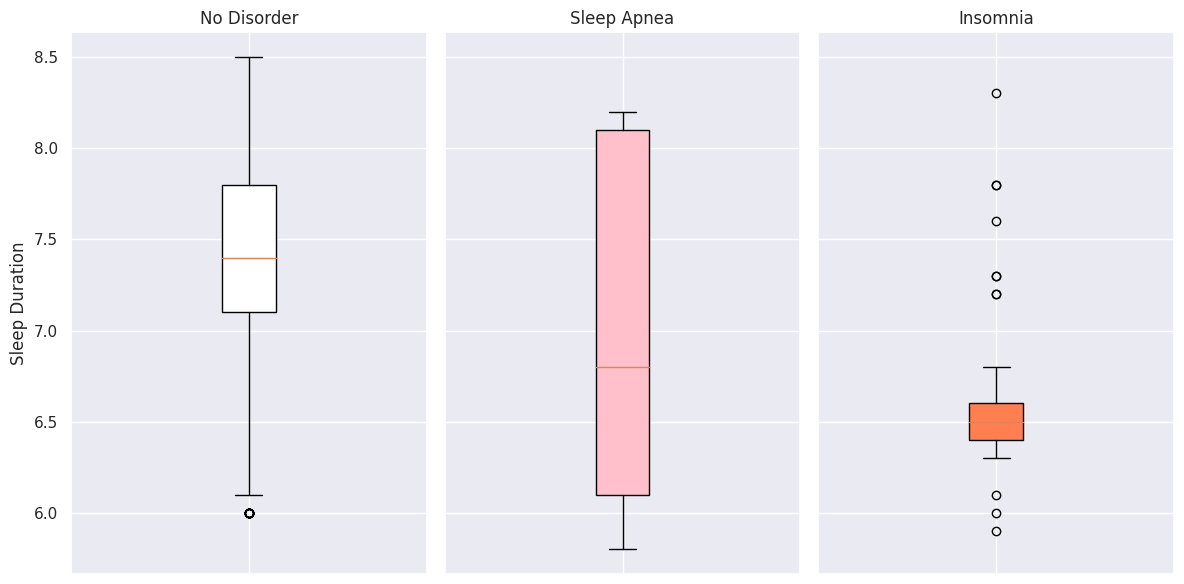

In [38]:
#Split data by sleep disorder
sleep_apnea_df = df[df['Sleep Disorder'] == 'Sleep Apnea']
insomnia_df = df[df['Sleep Disorder'] == 'Insomnia']
none_df = df[df['Sleep Disorder'] == 'None']

# Set up the figure and axis
fig, axes = plt.subplots(1, 3, figsize=(12, 6), sharey=True)

# Boxplot for 'None' sleep disorder, used same code for each disorder
axes[0].boxplot(none_df['Sleep Duration'], patch_artist=True, boxprops=dict(facecolor='white'))
axes[0].set_title('No Disorder')
axes[0].set_xticklabels('')


axes[1].boxplot(sleep_apnea_df['Sleep Duration'], patch_artist=True, boxprops=dict(facecolor='pink'))
axes[1].set_title('Sleep Apnea')
axes[1].set_xticklabels('')


axes[2].boxplot(insomnia_df['Sleep Duration'], patch_artist=True, boxprops=dict(facecolor='coral'))
axes[2].set_title('Insomnia')
axes[2].set_xticklabels('')

# Set a common ylabel for all subplots
axes[0].set_ylabel('Sleep Duration')

plt.tight_layout()
plt.show()


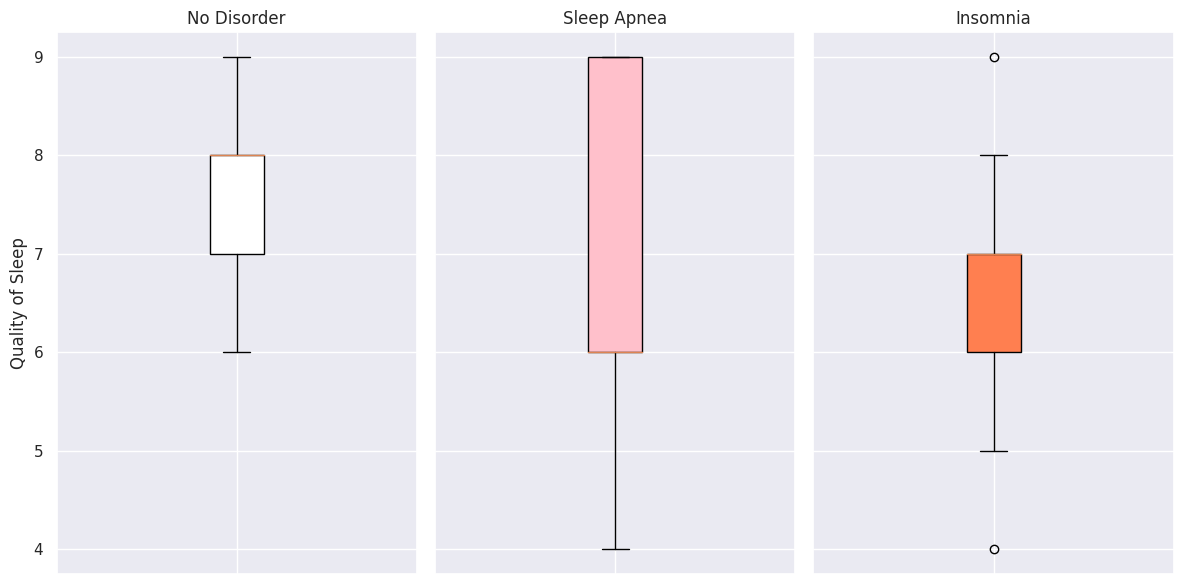

In [39]:


# Boxplot for 'None' sleep disorder, used for each sleep disorder
axes[0].boxplot(none_df['Quality of Sleep'], patch_artist=True, boxprops=dict(facecolor='white'))
axes[0].set_title('No Disorder')
axes[0].set_xticklabels('')


# Boxplot for 'Sleep Apnea' sleep disorder
axes[1].boxplot(sleep_apnea_df['Quality of Sleep'], patch_artist=True, boxprops=dict(facecolor='pink'))
axes[1].set_title('Sleep Apnea')
axes[1].set_xticklabels('')

# Boxplot for 'Insomnia' sleep disorder
axes[2].boxplot(insomnia_df['Quality of Sleep'], patch_artist=True, boxprops=dict(facecolor='coral'))
axes[2].set_title('Insomnia')
axes[2].set_xticklabels('')

axes[0].set_ylabel('Quality of Sleep')


plt.tight_layout()
plt.show()
